In [309]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu, threshold_local
from scipy import ndimage
from skimage import measure
from skimage.color import rgb2gray
from sklearn.cluster import KMeans

In [310]:
steps = []

for i in range(9):
    steps.append(np.genfromtxt("step{}.txt".format(i+1)))

In [455]:
innd = 3
img = steps[innd]
x,y = img.shape
img_reshape = img.reshape(-1, 1)
print(img_reshape.shape)

(1600, 1)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


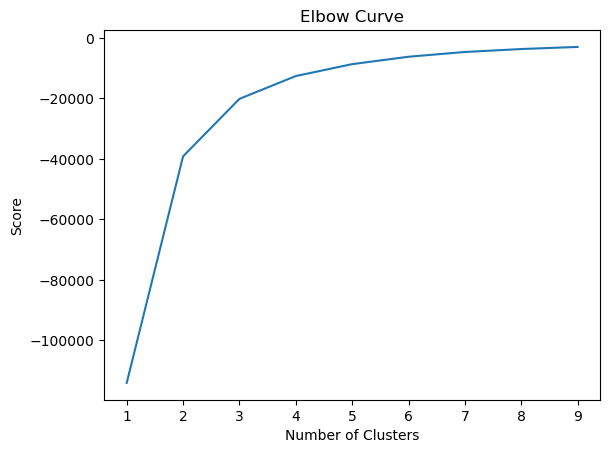

In [456]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(img_reshape).score(img_reshape) for i in range(len(kmeans))]

plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [463]:
n=3
kmeans = KMeans(n_clusters=n, random_state=0).fit(img_reshape)
clustered = kmeans.cluster_centers_[kmeans.labels_]
labels = kmeans.labels_

print(labels, labels.shape)

[0 0 0 ... 1 1 1] (1600,)


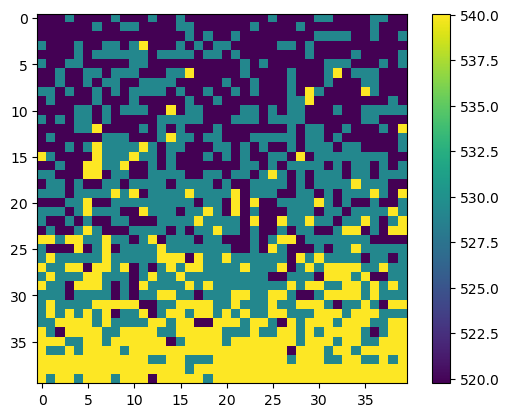

In [464]:
plt.imshow(clustered.reshape(img.shape))
plt.colorbar()

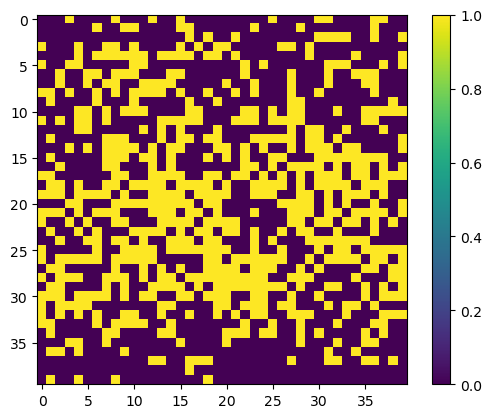

In [477]:
clustered_2 = np.copy(clustered)
cluster = 2
indx_2, indx_2p = np.where(labels!=cluster), np.where(labels==cluster)
clustered_2[indx_2] = 0
clustered_2[indx_2p] = 1
img_2 = clustered_2.reshape(img.shape)

plt.imshow(img_2)
plt.colorbar()

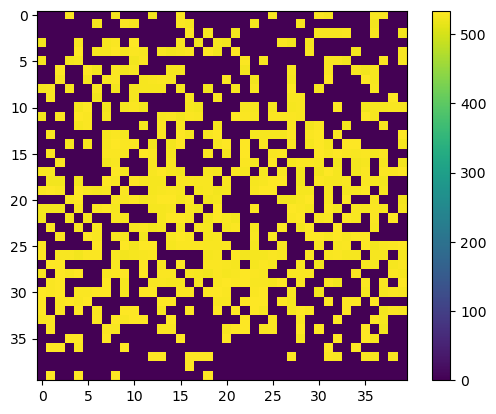

In [478]:
plt.imshow(img*img_2)
plt.colorbar()

(array([215., 214., 229.]),
 array([525., 528., 531., 534.]),
 <BarContainer object of 3 artists>)

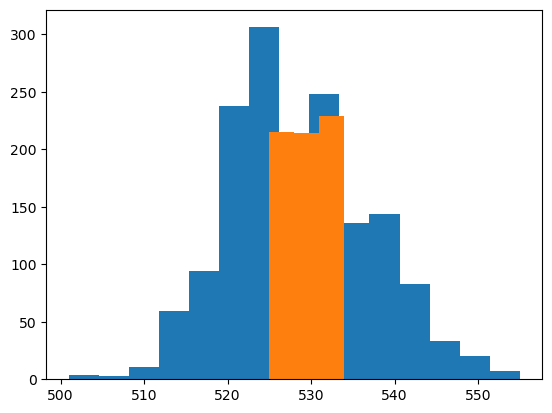

In [479]:
new_img = img*img_2
plt.hist(np.ravel(img), bins=15)
plt.hist(np.ravel(new_img)[np.where(np.ravel(new_img) != 0)], bins=3)

In [480]:
np.savetxt("new_step{}.txt".format(innd), new_img)